SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) hoạt động bằng cách chọn các sample gần nhau trong feature space, về một đường
thẳng giữa các sample trong đó và tạo ra một sample mới tại một điểm nào đó trên đường thẳng đó.

Một sample ngẫu nhiên từ minority class được chọn. Sau đó, tìm ra k sample gần nhất quanh sample đó (k = 5, tương tự KNN). Một neighbor
được chọn ngẫu nhiên và một synthetic sample được tạo ra tại một điểm được chọn ngẫu nhiên giữa hai vsamples trong feature space.

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

Counter({0: 9900, 1: 100})


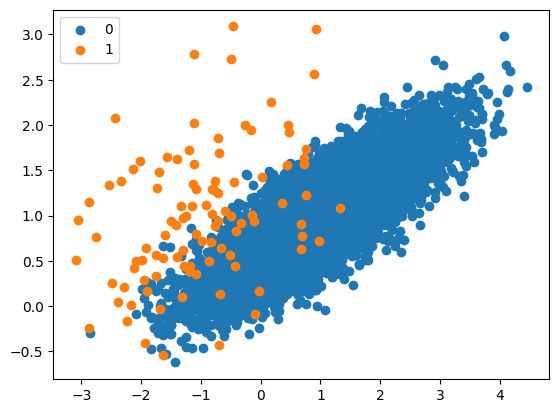

In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)
for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({0: 9900, 1: 9900})


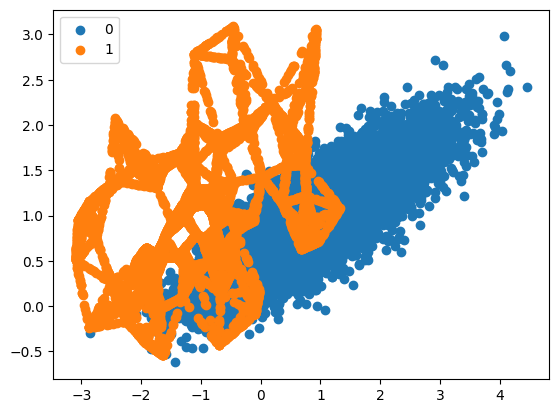

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

SMOTE for Classification

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.924


In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]
for k in k_values:
    oversample = SMOTE(k_neighbors=k)
    pipeline = Pipeline(steps=[('over',oversample),('model',LogisticRegression())])

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('ROC AUC: %.3f' % score)

ROC AUC: 0.916
ROC AUC: 0.920
ROC AUC: 0.922
ROC AUC: 0.923
ROC AUC: 0.924
ROC AUC: 0.924
ROC AUC: 0.925
ROC AUC: 0.926
ROC AUC: 0.926
ROC AUC: 0.926


Random Sampling

Data sampling liên quan đến việc tạo ra một new version cho dataset trong đó các data point được chọn có phân phối lớp khác nhau. Đây là
một chiến lược đơn giản và hiệu quả để giải quyết các vấn đề imbalance.
Một cách đơn giản nhất cho cơ chế sampling này là sử dụng random sampling. Random sampling có 2 cách tiếp cận đó là:

*    Random oversampling: Randomly duplicate
examples in the minority class.
*   Random Undersampling: Randomly delete examples in the majority class.



Random oversampling liên quan đến việc chọn ngẫu nhiên các data point từ minority class, với sự thay thế, và thêm chúng vào dataset.
Random undersampling liên quan đến việc chọn ngẫu nhiên các data point từ majority class và loại bỏ chúng dataset.
Cả hai phương pháp này có thể được lặp đi lặp lại cho đến khi số lượng giữa 2 class này bằng nhau. Phương pháp tiếp cận này được gọi là naive
method bởi vì nó chỉ đơn giản thêm, bớt data point sao cho sự chênh lệch giữa các class trong dataset là không còn mà không quan tảm đến
phân phối dữ liệu bên trong dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# define oversampling method

# sampling_strategy-'minority' - nghĩa  là nếu  majority class có 1000 data point còn minority class chỉ có 100 data point thi sẽ tự cân bằng minority class lên 1000 data point.

oversample = RandomOverSampler(sampling_strategy='minority')

# sampling_strategy-'minority" - đảm bảo rằng minority class sẽ được cân bằng lên số lượng bằng 1 nửa so vôi majority class tức là minority class lúc này chỉ lên 500 data point

oversamole = RandomOverSampler(sampling_strategy=0.5)

In [ ]:
# create dataset
X,y = make_classification(n_samples=10000,weights=[0.99],flip_y=0)
print(Counter(y))
oversample = RandomOverSampler(sampling_strategy='minority')
X_over,y_over= oversample.fit_resample(X,y)
print(Counter(y_over))
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over,y_over = oversample.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})
Counter({0: 9900, 1: 4950})


In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
X,y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
steps = [('over', RandomOverSampler(sampling_strategy='minority')), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('ROC AUC: %.3f' % score)
print(scores)

ROC AUC: 0.905
[0.892 0.898 0.916 0.901 0.908 0.916 0.915 0.908 0.887 0.902 0.902 0.905
 0.889 0.886 0.916 0.896 0.928 0.91  0.898 0.915 0.901 0.897 0.9   0.9
 0.918 0.907 0.914 0.91  0.897 0.91 ]


In [ ]:
X,y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
steps = [('over', RandomOverSampler(sampling_strategy=0.5)), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('ROC AUC: %.3f' % score)
print(scores)

ROC AUC: 0.901
[0.903 0.902 0.898 0.894 0.901 0.909 0.918 0.893 0.904 0.891 0.901 0.912
 0.895 0.914 0.882 0.892 0.912 0.908 0.902 0.91  0.902 0.902 0.894 0.907
 0.897 0.905 0.886 0.897 0.902 0.906]


UnderSampling for Classification

Counter({0: 9900, 1: 100})


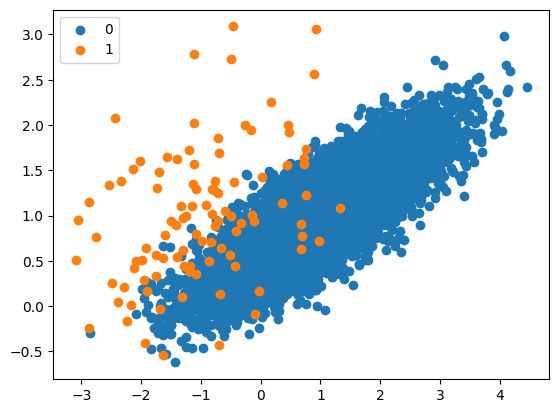

In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Near Miss underSampling

Near Miss undersampling có 3 loại:

*   NearMiss-1: Majority class samples with minimum average distance to three **closest** minority class samples.
*   NearMiss-2: Majority class samples with minimum average distance to three **furthest** minority class samples.
*   NearMiss-3: Majority class samples with minimum distance to each minority class sample.

NearMiss-1 chọn các sample từ majority class có khoảng cách trung bình nhỏ nhất đến ba sample gần nhất từ minority class. NearMiss-2 chọn
các sample từ majority class có khoảng cách trung bình nhỏ nhất đến ba sample xa nhất từ minority class. NearMiss-3 liên quan đến việc chọn
một số sample từ majority class cho mỗi sample trong minority class mà chúng gần nhất. Ở đây, khoảng cách được xác định trong không gian
đặc trưng bằng cách sử dụng khoảng cách Euclidean.

NearMiss-1

Counter({0: 9900, 1: 100})


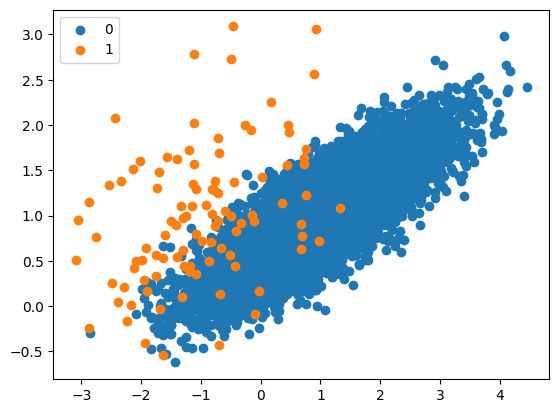

Counter({0: 100, 1: 100})


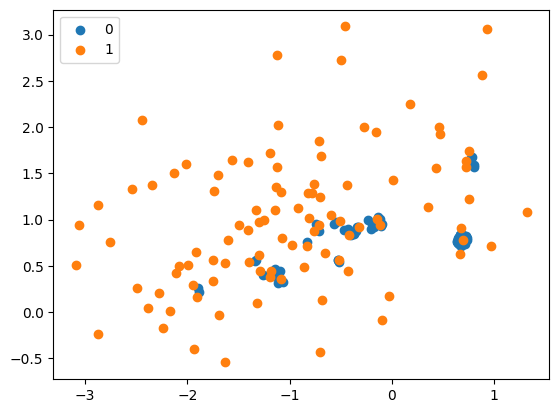

In [ ]:
from imblearn.under_sampling import NearMiss
X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = NearMiss(version=1, n_neighbors=3)
X,y = undersample.fit_resample(X,y)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

NearMiss-2

Counter({0: 9900, 1: 100})


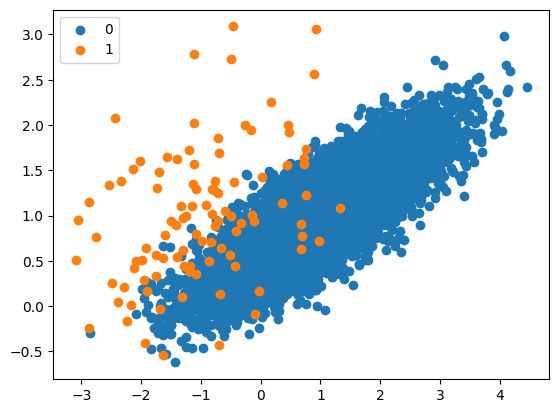

Counter({0: 100, 1: 100})


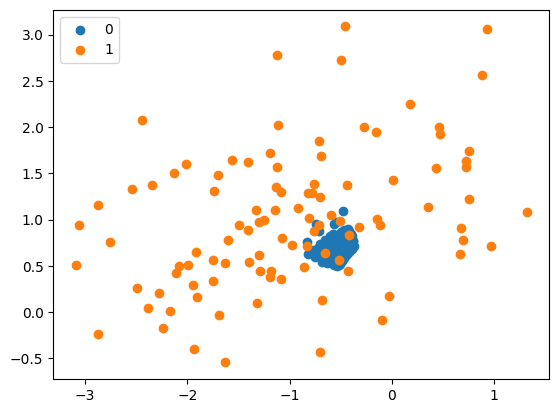

In [ ]:
from imblearn.under_sampling import NearMiss
X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = NearMiss(version=2, n_neighbors=3)
X,y = undersample.fit_resample(X,y)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

NearMiss-3

Counter({0: 9900, 1: 100})


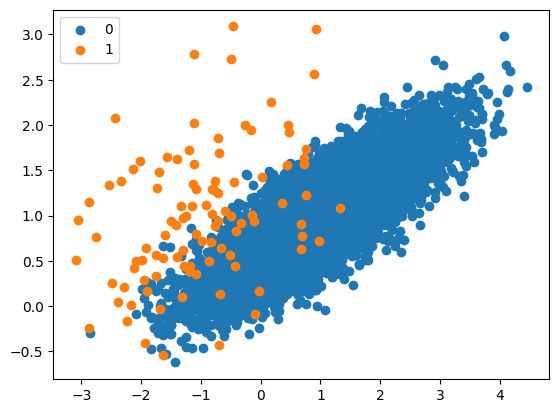

Counter({0: 100, 1: 100})


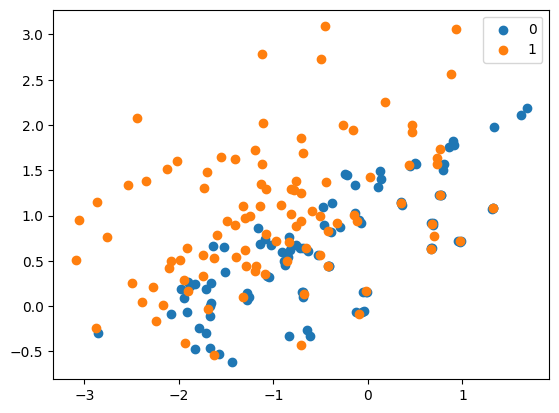

In [ ]:
from imblearn.under_sampling import NearMiss
X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = NearMiss(version=3, n_neighbors=3)
X,y = undersample.fit_resample(X,y)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Condensed Nearest Neighbor Rule Undersampling

Condensed Nearest Neighbor là kỹ thuật sampling lấy một tập con của dataset mà không giảm hiệu suất của model. Thực hiện bằng cách liệt
kê các sample trong dataset và chỉ thêm chúng vào dataset nếu chúng không thể được phân loại đúng bởi nội dung hiện tại của dataset.
Đối với bài toán Imbalance Classification, dataset được tạo bởi tất cả các sample trong minority set và chỉ có các sample từ majority set mà
không thể được phân loại đúng được thêm vào dataset một cách từ từ. Trong quá trình thực hiện, KNN được sử dụng để phân loại các điểm để
xác định xem chúng có nên được thêm vào dataset hay không.

Counter({0: 9900, 1: 100})


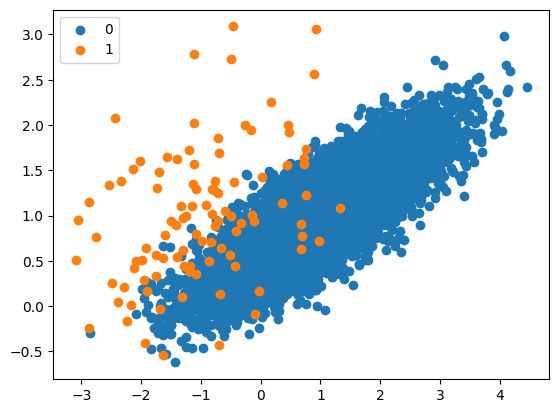

Counter({0: 188, 1: 100})


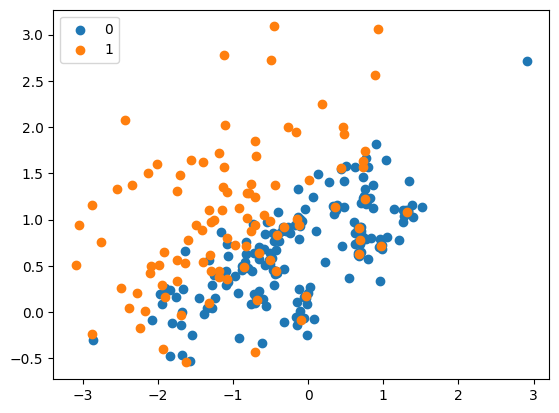

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

X, y= make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label,_ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
